In [1]:
#STEP: Import libraries for model
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

D:\InstalledSoftware\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#STEP: Design Covn model with MaxPooling and Dropout

def build_conv_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_accuracy])
    
    return model

In [3]:
#STEP: Use ImageDataGenerator and data-augmentation generators

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:/Users/write/OneDrive/Deep Learning Data/cats_and_dogs_subset/train'
validation_dir = 'C:/Users/write/OneDrive/Deep Learning Data/cats_and_dogs_subset/validation'
test_dir = 'C:/Users/write/OneDrive/Deep Learning Data/cats_and_dogs_subset/test'

train_datagen = ImageDataGenerator(
    rescale = 1. / 255
    , rotation_range = 40
    , width_shift_range = 0.2
    , height_shift_range = 0.2
    , shear_range = 0.2
    , zoom_range = 0.2
    , horizontal_flip = True
    ,)

test_datagen = ImageDataGenerator(rescale = 1. / 255)   #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                train_dir
                , target_size = (150, 150)
                , batch_size = 32
                , class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir
                , target_size = (150, 150)
                , batch_size = 32
                , class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
#STEP: Fitting model using a batch generator

model = build_conv_model()
history_conv = model.fit_generator(
            train_generator
            , steps_per_epoch = 100
            , epochs = 100
            , validation_data = validation_generator
            , validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 238s 2s/step - loss: 0.6929 - binary_accuracy: 0.5216 - val_loss: 0.6840 - val_binary_accuracy: 0.5298
Epoch 2/100
100/100 [==============================] - 224s 2s/step - loss: 0.6841 - binary_accuracy: 0.5559 - val_loss: 0.6637 - val_binary_accuracy: 0.6140
Epoch 3/100
100/100 [==============================] - 221s 2s/step - loss: 0.6770 - binary_accuracy: 0.5712 - val_loss: 0.6573 - val_binary_accuracy: 0.6104
Epoch 4/100
100/100 [==============================] - 221s 2s/step - loss: 0.6650 - binary_accuracy: 0.5981 - val_loss: 0.6372 - val_binary_accuracy: 0.6269
Epoch 5/100
100/100 [==============================] - 222s 2s/step - loss: 0.6541 - binary_accuracy: 0.6141 - val_loss: 0.7568 - val_binary_accuracy: 0.5355
Epoch 6/100
100/100 [==============================] - 223s 2s/step - loss: 0.6364 - binary_accuracy: 0.6397 - val_loss: 0.6067 - val_binary_accuracy: 0.6476
Epoch 7/100
100/100 [==============================]

100/100 [==============================] - 223s 2s/step - loss: 0.4371 - binary_accuracy: 0.7937 - val_loss: 0.4550 - val_binary_accuracy: 0.8041
Epoch 53/100
100/100 [==============================] - 220s 2s/step - loss: 0.4603 - binary_accuracy: 0.7881 - val_loss: 0.4305 - val_binary_accuracy: 0.7951
Epoch 54/100
100/100 [==============================] - 224s 2s/step - loss: 0.4435 - binary_accuracy: 0.7888 - val_loss: 0.4325 - val_binary_accuracy: 0.8003
Epoch 55/100
100/100 [==============================] - 221s 2s/step - loss: 0.4417 - binary_accuracy: 0.7888 - val_loss: 0.4542 - val_binary_accuracy: 0.7970
Epoch 56/100
100/100 [==============================] - 222s 2s/step - loss: 0.4435 - binary_accuracy: 0.7919 - val_loss: 0.4288 - val_binary_accuracy: 0.7990
Epoch 57/100
100/100 [==============================] - 222s 2s/step - loss: 0.4439 - binary_accuracy: 0.7931 - val_loss: 0.5648 - val_binary_accuracy: 0.7326
Epoch 58/100
100/100 [==============================] - 220

In [5]:
#STEP: Save model
model.save('cats_and_dogs_subset_2.h5')

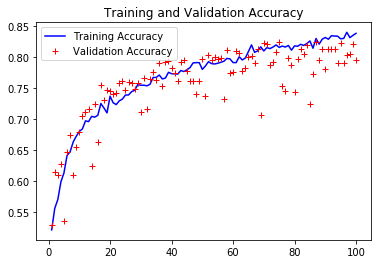

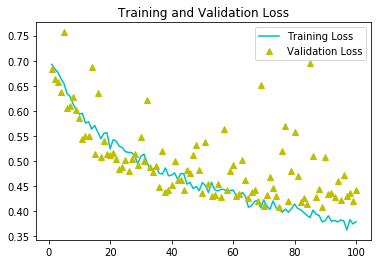

In [7]:
#STEP: Plot the results

import matplotlib.pyplot as plt

acc = history_conv.history['binary_accuracy']
val_acc = history_conv.history['val_binary_accuracy']

loss = history_conv.history['loss']
val_loss = history_conv.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r+', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'c', label = 'Training Loss')
plt.plot(epochs, val_loss, 'y^', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()